In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv(r'D:\nam_3\data_mining\BTL\car_sales_data.csv')
df.head()

,Date,Salesperson,Customer Name,Car Make,Car Model,Car Year,Sale Price,Commission Rate,Commission Earned
0,2022-08-01,Monica Moore MD,Mary Butler,Nissan,Altima,2018,15983,0.070495,1126.73
1,2023-03-15,Roberto Rose,Richard Pierce,Nissan,F-150,2016,38474,0.134439,5172.40
2,2023-04-29,Ashley Ramos,Sandra Moore,Ford,Civic,2016,33340,0.114536,3818.63
3,2022-09-04,Patrick Harris,Johnny Scott,Ford,Altima,2013,41937,0.092191,3866.20
4,2022-06-16,Eric Lopez,Vanessa Jones,Honda,Silverado,2022,20256,0.113490,2298.85


In [3]:
df['TotalTransactions'] = 1
df.head()

,Date,Salesperson,Customer Name,Car Make,Car Model,Car Year,Sale Price,Commission Rate,Commission Earned,TotalTransactions
0,2022-08-01,Monica Moore MD,Mary Butler,Nissan,Altima,2018,15983,0.070495,1126.73,1
1,2023-03-15,Roberto Rose,Richard Pierce,Nissan,F-150,2016,38474,0.134439,5172.40,1
2,2023-04-29,Ashley Ramos,Sandra Moore,Ford,Civic,2016,33340,0.114536,3818.63,1
3,2022-09-04,Patrick Harris,Johnny Scott,Ford,Altima,2013,41937,0.092191,3866.20,1
4,2022-06-16,Eric Lopez,Vanessa Jones,Honda,Silverado,2022,20256,0.113490,2298.85,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500000 entries, 0 to 2499999
Data columns (total 10 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Date               object 
 1   Salesperson        object 
 2   Customer Name      object 
 3   Car Make           object 
 4   Car Model          object 
 5   Car Year           int64  
 6   Sale Price         int64  
 7   Commission Rate    float64
 8   Commission Earned  float64
 9   TotalTransactions  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 190.7+ MB


d:\nam_3\data_mining\BTL\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster Centers:
 [[16693.2572053 ]
 [30066.60724419]
 [43381.20829791]]
               Date      Salesperson    Customer Name   Car Make  Car Model  \
0        2022-08-01  Monica Moore MD      Mary Butler     Nissan     Altima   
1        2023-03-15     Roberto Rose   Richard Pierce     Nissan      F-150   
2        2023-04-29     Ashley Ramos     Sandra Moore       Ford      Civic   
3        2022-09-04   Patrick Harris     Johnny Scott       Ford     Altima   
4        2022-06-16       Eric Lopez    Vanessa Jones      Honda  Silverado   
...             ...              ...              ...        ...        ...   
2499995  2022-05-26   Isabella Moore      Shirley Lee  Chevrolet  Silverado   
2499996  2022-10-03    Kimberly Snow     Tara Rodgers       Ford      F-150   
2499997  2022-06-07    Jessica Young   Jennifer Moore  Chevrolet      Civic   
2499998  2023-02-15    Donald Barber      Ashley Diaz      Honda  Silverado   
2499999  2023-03-24     Kayla Fowler  Nathan Thompson     

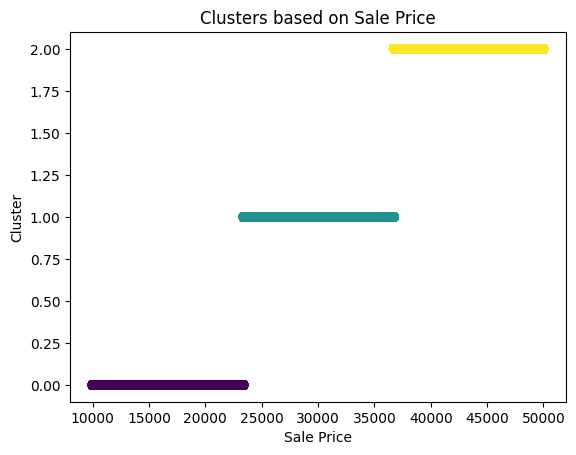

In [5]:
num_clusters = 3

# Chọn thuộc tính cần sử dụng cho việc gom cụm (ở đây sử dụng 'Sale Price')
X = df[['Sale Price']]

# Sử dụng KMeans để gom cụm
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Hiển thị các cụm
print("Cluster Centers:\n", kmeans.cluster_centers_)
print(df)

# Vẽ biểu đồ
plt.scatter(df['Sale Price'], df['Cluster'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Sale Price')
plt.ylabel('Cluster')
plt.title('Clusters based on Sale Price')
plt.show()

d:\nam_3\data_mining\BTL\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\nam_3\data_mining\BTL\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\nam_3\data_mining\BTL\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\nam_3\data_mining\BTL\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1

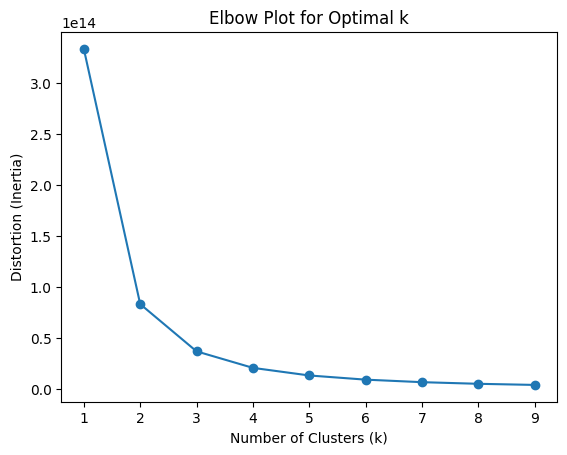

In [6]:
# Thực hiện Elbow method để chọn số lượng cụm tối ưu
distortions = []
possible_k_values = range(1, 10)
for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

# Vẽ Elbow plot
plt.plot(possible_k_values, distortions, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion (Inertia)')
plt.title('Elbow Plot for Optimal k')
plt.show()

-   VẬY TA CHỌN K = 2

In [7]:
df.head()

,Date,Salesperson,Customer Name,Car Make,Car Model,Car Year,Sale Price,Commission Rate,Commission Earned,TotalTransactions,Cluster
0,2022-08-01,Monica Moore MD,Mary Butler,Nissan,Altima,2018,15983,0.070495,1126.73,1,0
1,2023-03-15,Roberto Rose,Richard Pierce,Nissan,F-150,2016,38474,0.134439,5172.40,1,2
2,2023-04-29,Ashley Ramos,Sandra Moore,Ford,Civic,2016,33340,0.114536,3818.63,1,1
3,2022-09-04,Patrick Harris,Johnny Scott,Ford,Altima,2013,41937,0.092191,3866.20,1,2
4,2022-06-16,Eric Lopez,Vanessa Jones,Honda,Silverado,2022,20256,0.113490,2298.85,1,0


In [10]:
df = df.drop(columns='Cluster')
df.head()

,Date,Salesperson,Customer Name,Car Make,Car Model,Car Year,Sale Price,Commission Rate,Commission Earned,TotalTransactions
0,2022-08-01,Monica Moore MD,Mary Butler,Nissan,Altima,2018,15983,0.070495,1126.73,1
1,2023-03-15,Roberto Rose,Richard Pierce,Nissan,F-150,2016,38474,0.134439,5172.40,1
2,2023-04-29,Ashley Ramos,Sandra Moore,Ford,Civic,2016,33340,0.114536,3818.63,1
3,2022-09-04,Patrick Harris,Johnny Scott,Ford,Altima,2013,41937,0.092191,3866.20,1
4,2022-06-16,Eric Lopez,Vanessa Jones,Honda,Silverado,2022,20256,0.113490,2298.85,1


d:\nam_3\data_mining\BTL\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster Centers:
 [[0.0995059 ]
 [0.06640822]
 [0.13308524]]
               Date      Salesperson    Customer Name   Car Make  Car Model  \
0        2022-08-01  Monica Moore MD      Mary Butler     Nissan     Altima   
1        2023-03-15     Roberto Rose   Richard Pierce     Nissan      F-150   
2        2023-04-29     Ashley Ramos     Sandra Moore       Ford      Civic   
3        2022-09-04   Patrick Harris     Johnny Scott       Ford     Altima   
4        2022-06-16       Eric Lopez    Vanessa Jones      Honda  Silverado   
...             ...              ...              ...        ...        ...   
2499995  2022-05-26   Isabella Moore      Shirley Lee  Chevrolet  Silverado   
2499996  2022-10-03    Kimberly Snow     Tara Rodgers       Ford      F-150   
2499997  2022-06-07    Jessica Young   Jennifer Moore  Chevrolet      Civic   
2499998  2023-02-15    Donald Barber      Ashley Diaz      Honda  Silverado   
2499999  2023-03-24     Kayla Fowler  Nathan Thompson      Honda      

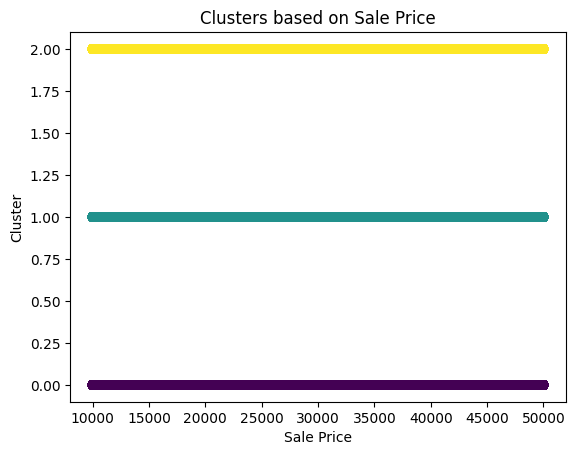

In [11]:
num_clusters = 3

# Chọn thuộc tính cần sử dụng cho việc gom cụm (ở đây sử dụng 'Sale Price')
X = df[['Commission Rate']]

# Sử dụng KMeans để gom cụm
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Hiển thị các cụm
print("Cluster Centers:\n", kmeans.cluster_centers_)
print(df)

# Vẽ biểu đồ
plt.scatter(df['Commission Rate'], df['Cluster'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Commission Rate')
plt.ylabel('Cluster')
plt.title('Clusters based on Commission Rate')
plt.show()